# Remove missing 
Data normalizations(min max Scalling)

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from PIL import Image
from glob import glob

In [2]:
import pickle

In [3]:
# load pickle data
df = pickle.load(open('./data/dataframe_images_100_100.pickle','rb'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5468 entries, 0 to 6057
Columns: 10001 entries, gender to 9999
dtypes: object(1), uint8(10000)
memory usage: 52.2+ MB


In [5]:
# checking for missing values
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

In [6]:
# removing missing values
df.dropna(axis=0,inplace=True)

In [7]:
#lets check
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

In [8]:
# split the into two parts
X = df.iloc[:,1:].values # inpendent features
y = df.iloc[:,0].values # dependent

In [9]:
X.shape

(5468, 10000)

# Min Max Scalling

In [10]:
#Xnorm =  x−minValue/maxValue−minValue

In [11]:
X.min() , X.max()

(0, 255)

In [12]:
Xnorm = X / X.max()

In [13]:
Xnorm

array([[0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.08627451, 0.11764706, 0.15294118, ..., 0.74509804, 0.69411765,
        0.69411765],
       ...,
       [0.09803922, 0.09803922, 0.10196078, ..., 0.11764706, 0.12156863,
        0.13333333],
       [0.08235294, 0.10588235, 0.12156863, ..., 0.07843137, 0.08627451,
        0.09803922],
       [0.01568627, 0.01176471, 0.00784314, ..., 0.35294118, 0.35294118,
        0.36470588]])

In [14]:
Xnorm.shape

(5468, 10000)

In [15]:
# female = 1, male = 0
y_norm = np.where(y=='female',1,0)

In [16]:
# save x and y in numpy zip
np.savez('./data/data_10000_norm.npz',Xnorm,y_norm)

# Feature extraction Eigen images(PCA)

In [17]:
# load numpy zip
data = np.load('./data/data_10000_norm.npz')

In [18]:
data.files

['arr_0', 'arr_1']

In [19]:
X  = data['arr_0'] # independent features
y = data['arr_1'] # target value

In [20]:
X.shape, y.shape

((5468, 10000), (5468,))

# Eigen Images

In [21]:
X1 = X - X.mean(axis=0)

In [22]:
from sklearn.decomposition import PCA

In [23]:
# the idea of PCA is identify large values
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [24]:
x_pca = pca.fit_transform(X1)

In [25]:
x_pca.shape

(5468, 5468)

In [26]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

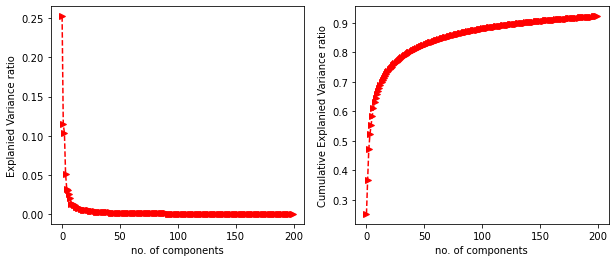

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explanied Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explanied Variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

# conclusion: using elbow method, consider number of compoenent is between 25 - 30

since if I consider component between 25 to 30 the explained variance is around 75 % so, in order to get min 80% variance I am considering 50 compoenents

In [31]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [32]:
x_pca_50.shape

(5468, 50)

In [33]:
# saving pca
import pickle

In [34]:
pickle.dump(pca_50,open('./model/pca_50.pickle','wb'))

# part2 Eigen images PCA

In [35]:
# consider 50 compnent and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [36]:
x_pca_inv.shape

(5468, 10000)

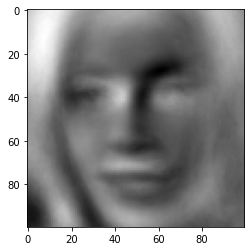

In [37]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

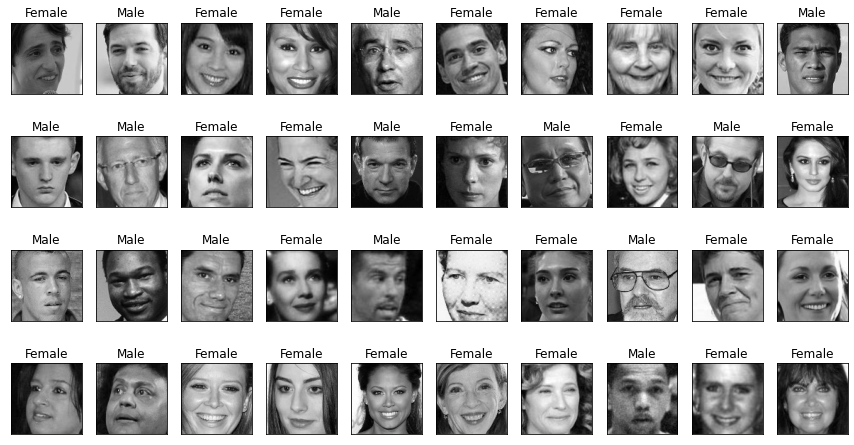

====================Eigen Images====================


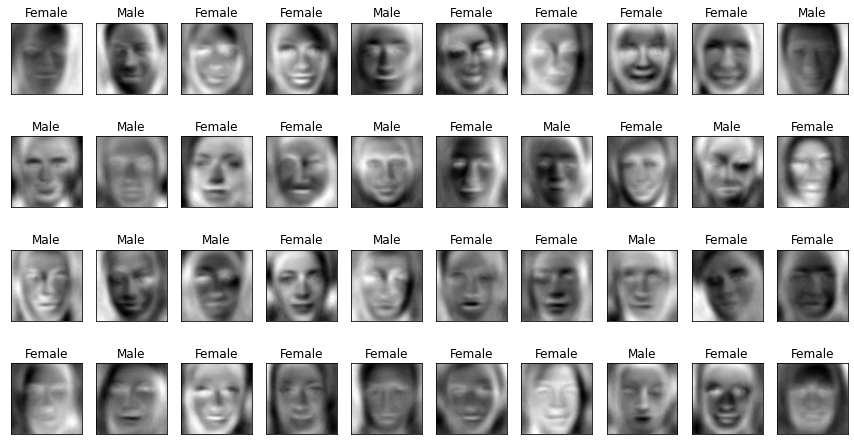

In [38]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [39]:
# saving 
np.savez('./data/data_pca_50_y_mean.pickle',x_pca_50,y,X.mean(axis=0))